In [2]:
# Standard Libraries
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [4]:
DATA_LOCATION = ''

In [5]:
def powerlabel_T2_data(dataset_path: str):
  original_data = pd.read_csv(DATA_LOCATION+dataset_path)
  data = original_data.copy()
  data['id'] = original_data['id'].apply(lambda x: DATA_LOCATION + 'images/' + x + '.jpg')
  #Eliminated because their values proportion of 1/0 is 90/10
  data.drop(['T2.4: Disgust', 'T2.5: Anger', 'T2.7: Neutral'], axis=1, inplace=True)
  columns = data.columns[1:]
  weights = [2**i for i in reversed(range(len(columns)))]
  #Applying PowerLabelset Transformation and createing a column to store to which powerlabel each image belongs to
  data['powerlabel'] = data.apply(lambda x: sum(weight * x[col] for col, weight in zip(columns, weights)), axis=1)

  return data

data = powerlabel_T2_data(dataset_path ='multilabel_dataset.csv')

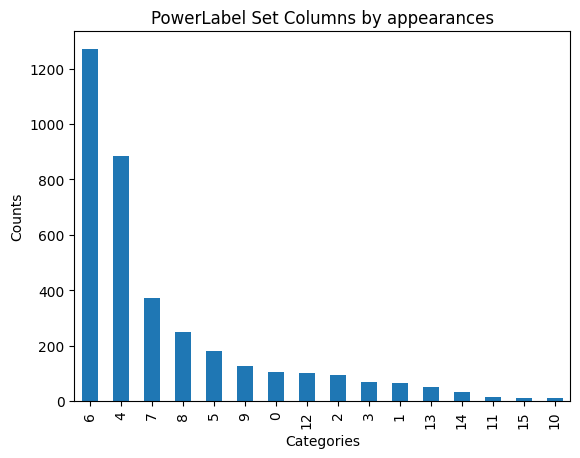

In [6]:
import matplotlib.pyplot as plt

# Get value counts of the column
value_counts = data['powerlabel'].value_counts()

# Plot the bar chart
value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('PowerLabel Set Columns by appearances')

# Show the chart
plt.show()

In [7]:
unpleasant_powerlabels = [0, 10, 11, 13, 14, 15]
found_powerlabels = data['powerlabel'].value_counts().sort_values(ascending=False).head(30).index.tolist()
usable_powerlabels = [label for label in found_powerlabels if label not in unpleasant_powerlabels]
data = data[data['powerlabel'].isin(usable_powerlabels)]
data.to_csv(DATA_LOCATION+'T2_powerlabel_dataset.csv', index=False)